<a href="https://colab.research.google.com/github/KOdin2/Machine-learning/blob/pre-processing/Comparison_of_LDA_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LDA and PCA transform**

This notebook allows for the upload of a .csv file, which can then be transformed by LDA or PCA. The data will be split using K-fold cross validion, with K being a user choice.

The difference in accuracy results will be compared


In [4]:
import numpy as np
from sklearn.model_selection import KFold
import io
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
def overall_accuracy_cal(conf):

  a = 0
  total_samples = np.sum(conf)
  total_trues = 0

  for row in conf:
    total_trues += row[a]
    a+=1

  overall_accuracy = round((total_trues/total_samples)*100,3)

  return overall_accuracy

This cell will allow you to upload .csv files from your computer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving All colours - Alu.csv to All colours - Alu (1).csv


In [5]:
for key in uploaded:

  #loads in the file and save to main_file
  print("File uploaded: " +str(key))
  df = pd.read_csv(io.BytesIO(uploaded[key]))


File uploaded: All colours - Alu.csv


This cell allows you to choose the number of K-fold splits you want to use. The random state is also choosen which allows the data to be split and shuffled the same every time: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [6]:
number_of_splits    = int(input("Number of K-Fold splits: "))
random_state_value  = int(input("Random state value: "))
kf = KFold(n_splits=number_of_splits, shuffle=True, random_state = random_state_value)

Number of K-Fold splits: 10
Random state value: 0


This cell assigns the classifier. If a different classifer is to be used you must ensure that it is imported

In [7]:
  from sklearn.svm import SVC
    #use a SVM classifer to predict using the train and test data set: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  classifier =SVC(C=1, kernel='linear', random_state=0 )


This cell will seperate the data for K-fold cross validation. It will then train and test the classifer assigned above. This will occur for every K-fold and a final "total" confusion matrix will be calculated. From this the accuracy of the confusion matrix will be displayed in the next cell to sperate the results. 

The accuracy of each fold will be displayed and the separation of the test set displayed in a scatter graphs for LDA and PCA. removing the 

Fold 1:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.76


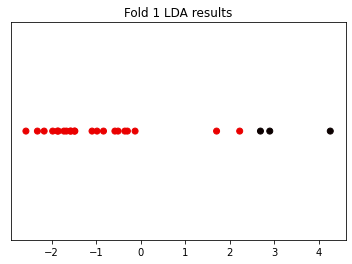

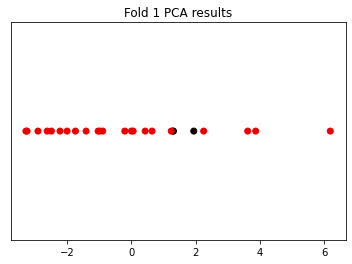

Fold 2:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.88


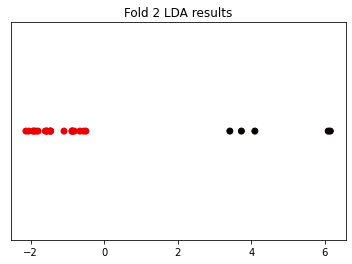

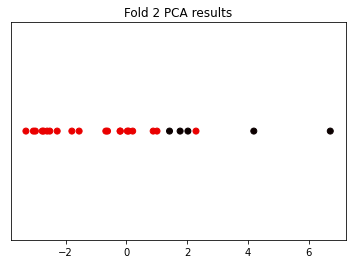

Fold 3:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.96


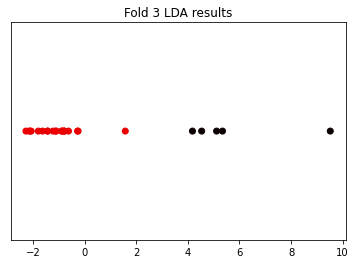

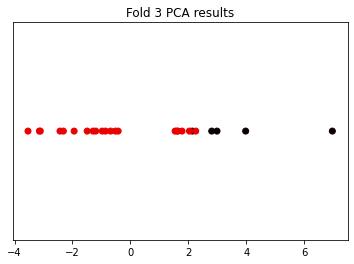

Fold 4:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.92


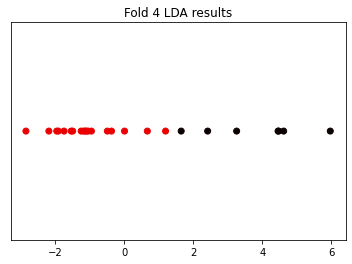

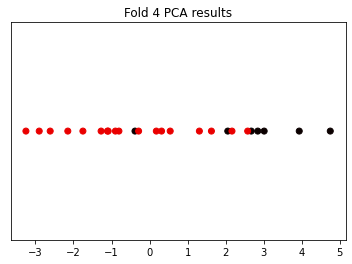

Fold 5:	Data accuracy: 0.96 LDA accuracy: 0.96 PCA accuracy: 0.96


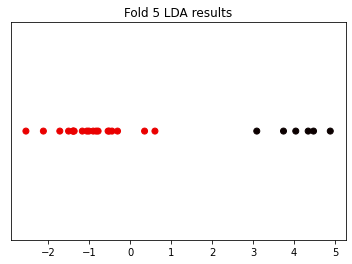

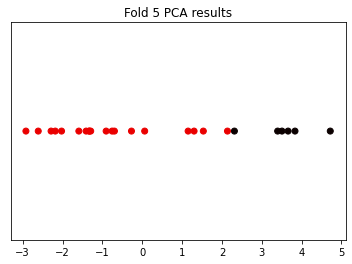

Fold 6:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.84


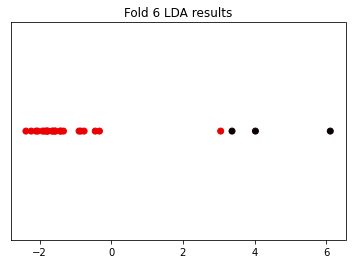

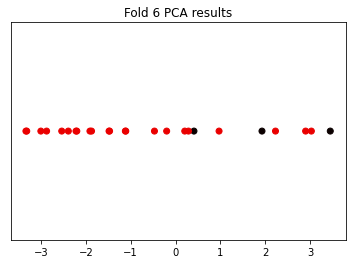

Fold 7:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.83


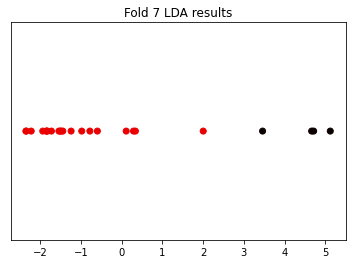

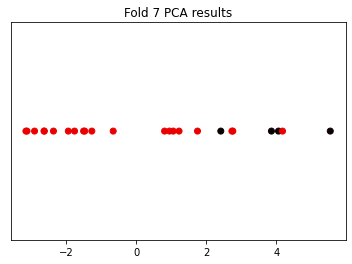

Fold 8:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.79


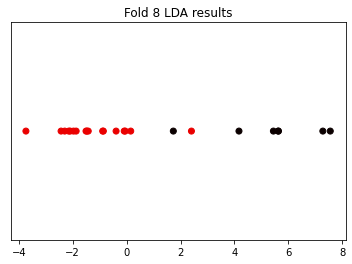

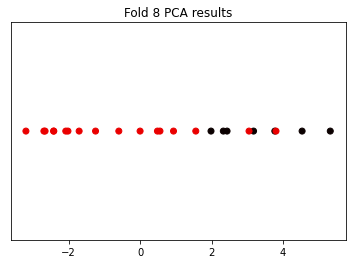

Fold 9:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.92


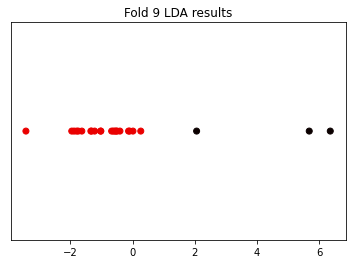

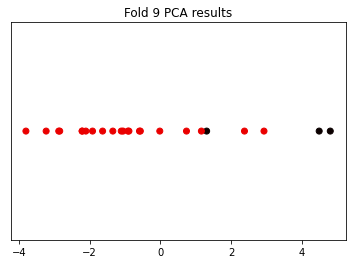

Fold 10:	Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 1.0


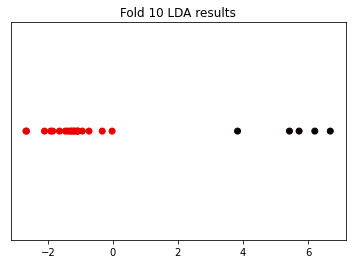

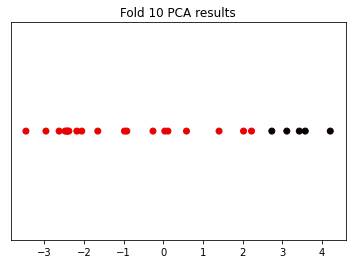

In [21]:
#create varibles for the total accuracy of the classifcaton of the data.
total_acc = lda_total_acc = pca_total_acc = qda_total_acc = 0
total_cm = lda_total_cm = pca_total_cm = qda_total_cm = 0

#assign and X and y (data and labels)
X = df[df.columns[1:len(df.columns)]] 
X = X.abs()
y = df.iloc[:,0]

fold = 1
for train_index, test_index in kf.split(df):
  #assign the train and test varibles
  x_train = X.iloc[train_index]
  x_test = X.iloc[test_index]
  y_train = y[train_index]
  y_test = y[test_index]

  #standarise the data: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
  scaler  = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test  = scaler.transform(x_test)

  #Used the train data set to transform the test dataset with LDA: https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda
  lda = LDA(n_components=1)
  lda_x_train = lda.fit_transform(x_train, y_train)
  lda_x_test = lda.transform(x_test)

  #Used the train data set to transform the test dataset with PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  pca = PCA(n_components=1)
  pca_x_train = pca.fit_transform(x_train, y_train)
  pca_x_test = pca.transform(x_test)
  
  #predict the accuracy of the orginal data
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)

  #predict the accuracy of the LDA data
  classifier.fit(lda_x_train, y_train)
  lda_y_pred = classifier.predict(lda_x_test)

  #predict the accuracyb of the PCA data
  classifier.fit(pca_x_train, y_train)
  pca_y_pred = classifier.predict(pca_x_test)

  #create and print the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  acc = round(accuracy_score(y_test, y_pred),2)
  total_cm = total_cm + cm

  cm = confusion_matrix(y_test, lda_y_pred)
  lda_acc = round( accuracy_score(y_test, lda_y_pred),2)
  lda_total_cm = lda_total_cm + cm

  cm = confusion_matrix(y_test, pca_y_pred)
  pca_acc = round( accuracy_score(y_test, pca_y_pred),2)
  pca_total_cm = pca_total_cm + cm

  total_acc     = total_acc     + acc
  lda_total_acc = lda_total_acc + lda_acc
  pca_total_acc = pca_total_acc + pca_acc

  print('Fold ' + str(fold) + ':\tData accuracy: ' + str(acc)+ ' LDA accuracy: ' + str(acc)   +   ' PCA accuracy: ' + str(pca_acc))

  #plots scatter grpahs, remove these next lines of code to remove this displaying of graphs
  plt.scatter(lda_x_test, np.zeros_like(lda_x_test), c = y_test, cmap="hot_r", vmin=-2 )
  plt.yticks([])
  plt.title('Fold ' + str(fold) + " LDA results")
  plt.show()
  plt.scatter(pca_x_test, np.zeros_like(pca_x_test), c = y_test, cmap="hot_r", vmin=-2 )
  plt.yticks([])
  plt.title('Fold ' + str(fold) + " PCA results")
  plt.show()

  fold+=1

In [11]:
#print the overall accuracy of the final confusion matrix and the confusion matrix
print("\nTotal accuracy of data: " + str(overall_accuracy_cal(total_cm))+"%")
print(total_cm)

print("Total accuracy of LDA: " + str(overall_accuracy_cal(lda_total_cm)) +"%")
print(lda_total_cm)

print("Total accurcy of PCA: " + str(overall_accuracy_cal(pca_total_cm))+"%")
print(pca_total_cm)


Total accuracy of data: 99.593%
[[198   0]
 [  1  47]]
Total accuracy of LDA: 97.967%
[[197   1]
 [  4  44]]
Total accurcy of PCA: 88.618%
[[187  11]
 [ 17  31]]
